<a href="https://colab.research.google.com/github/1995subhankar1995/AE-VAE-GAN-implementation/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])
trainset = tv.datasets.CIFAR10(root='./data',  train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
#defining some params
num_epochs = 25 #you can go for more epochs, I am using a mac
batch_size = 128

In [ ]:
model = Autoencoder().cuda()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [ ]:
def save_decoded_image(img, epoch):
    img = img.view(img.size(0), 3, 32, 32)
    save_image(img, './CIFAR10/linear_ae_image{}.png'.format(epoch))

In [ ]:
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))

epoch [1/25], loss:0.3006
epoch [2/25], loss:0.2954
epoch [3/25], loss:0.2937
epoch [4/25], loss:0.2922
epoch [5/25], loss:0.2918
epoch [6/25], loss:0.2913
epoch [7/25], loss:0.2894
epoch [8/25], loss:0.2904
epoch [9/25], loss:0.2889
epoch [10/25], loss:0.2874
epoch [11/25], loss:0.2869
epoch [12/25], loss:0.2870
epoch [13/25], loss:0.2863
epoch [14/25], loss:0.2867
epoch [15/25], loss:0.2866
epoch [16/25], loss:0.2851
epoch [17/25], loss:0.2852
epoch [18/25], loss:0.2895
epoch [19/25], loss:0.2849
epoch [20/25], loss:0.2851
epoch [21/25], loss:0.2846
epoch [22/25], loss:0.2847
epoch [23/25], loss:0.2852
epoch [24/25], loss:0.2846
epoch [25/25], loss:0.2842


In [ ]:
from google.colab.patches import cv2_imshow
def tensor_image(tensor):
  tensor = tensor.mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0)
  ndarr = tensor.to('cpu', torch.uint8).numpy()
  cv2_imshow(ndarr)

In [ ]:
images = []
outputs = []
for img, _ in testloader:
  img = img.cuda()
  output = model(img)
  #print(img.shape, "dakh", output.shape)
  images.append(img)
  outputs.append(output)

Actual


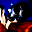

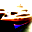

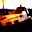

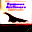

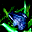

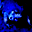

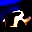

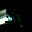

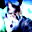

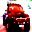

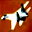

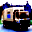

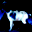

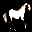

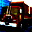

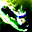

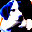

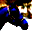

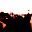

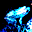

Generated images


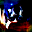

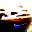

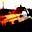

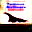

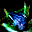

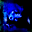

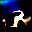

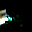

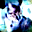

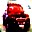

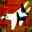

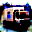

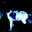

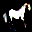

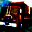

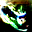

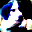

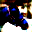

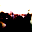

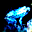

In [ ]:
print("Actual")
j = 0
for img in images:
  for i in range(4):
    tensor_image(img[i])
  j += 1
  if j == 5:
    break

print("Generated images")
j = 0
for output in outputs:
  for i in range(4):
    tensor_image(output[i])
  j += 1
  if j == 5:
    break